# Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
pd.set_option('display.max.column',40)

In [2]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'..\datasets\IBM_HR\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
TARGET_COL = 'Attrition'

# EDA

## Target Distribution

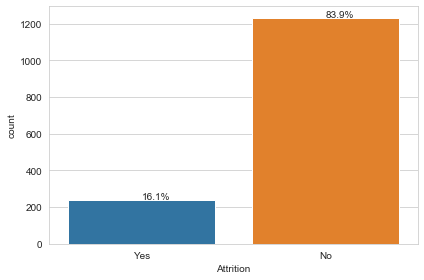

In [10]:
sns.set_style('whitegrid')
ax = sns.countplot(df[TARGET_COL])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))
# plt.legend(True)        
plt.tight_layout()   

## Numerical Columns

In [11]:
num_cols = list(df.select_dtypes(exclude='O').columns)
num_cols.remove('EmployeeCount')
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

###  Cat plots

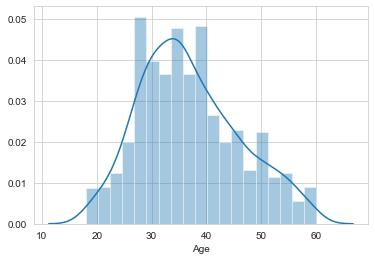

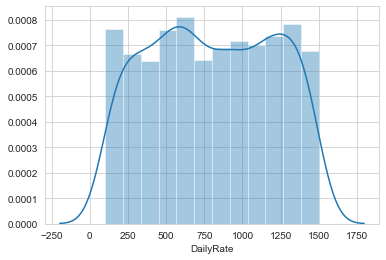

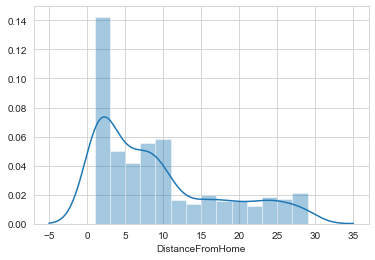

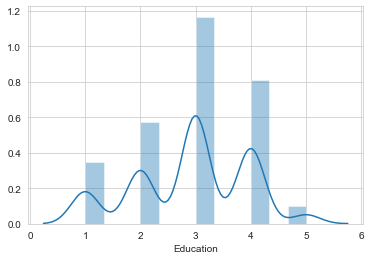

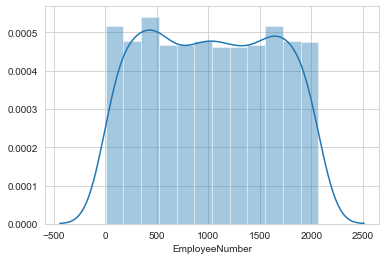

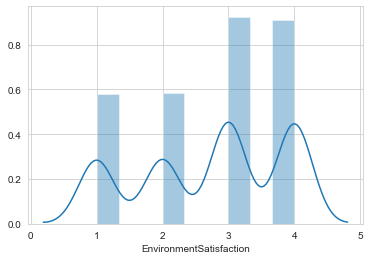

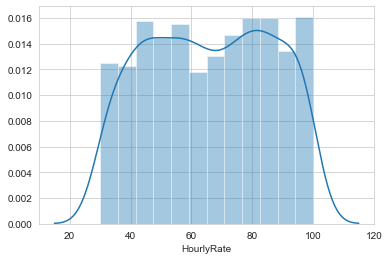

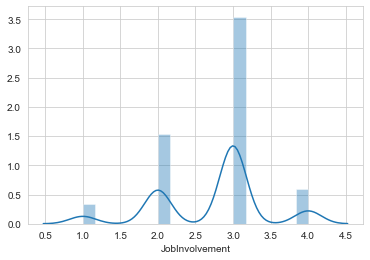

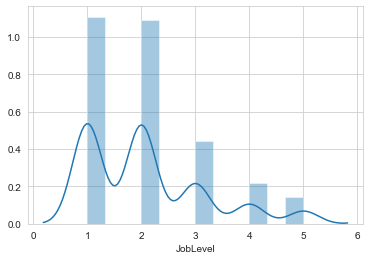

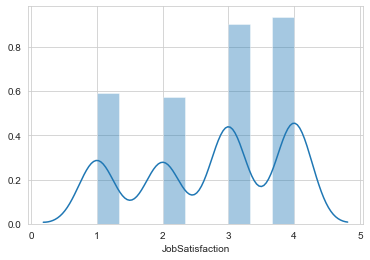

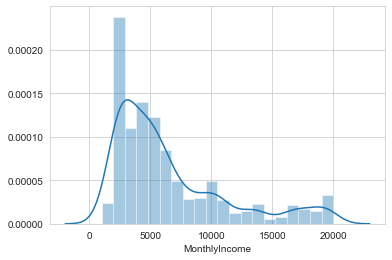

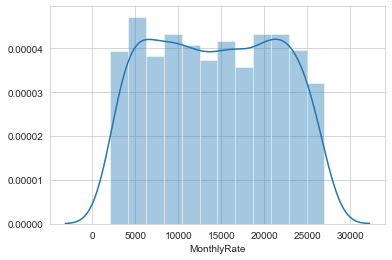

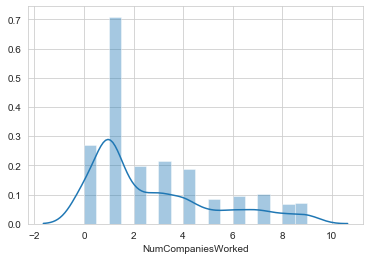

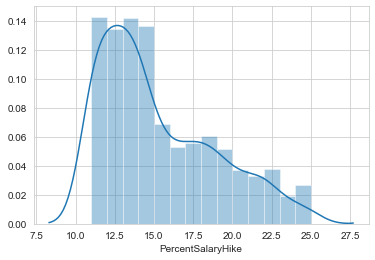

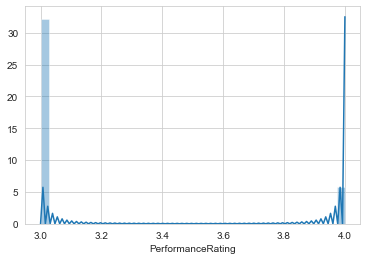

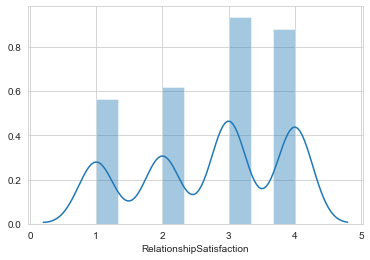

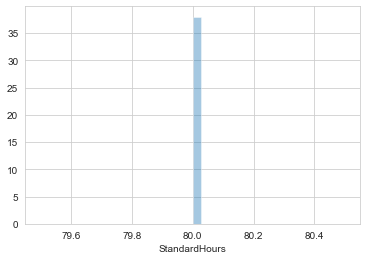

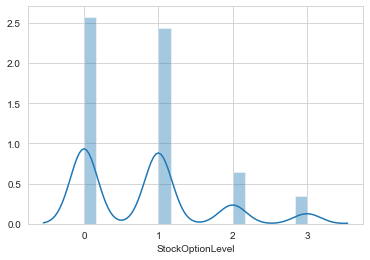

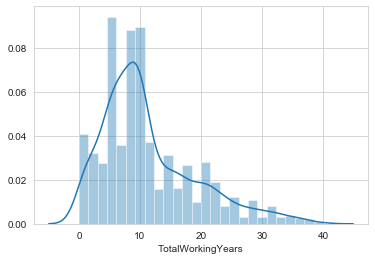

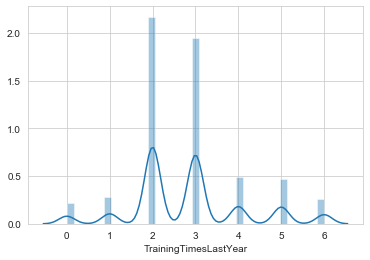

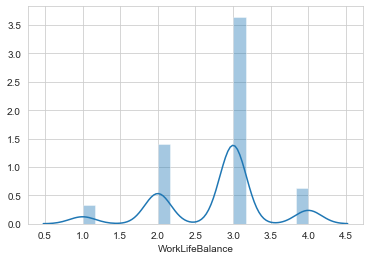

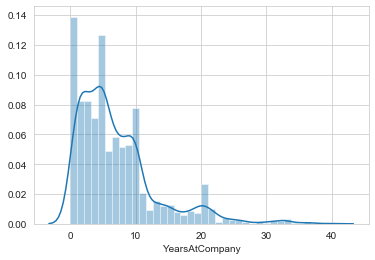

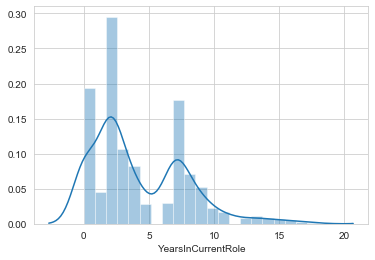

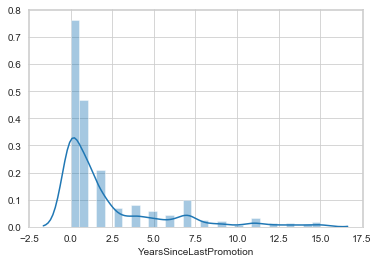

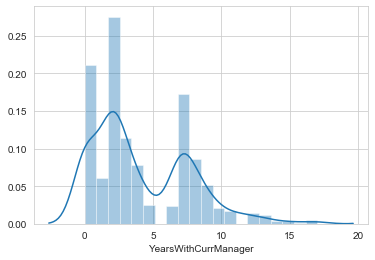

In [12]:
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

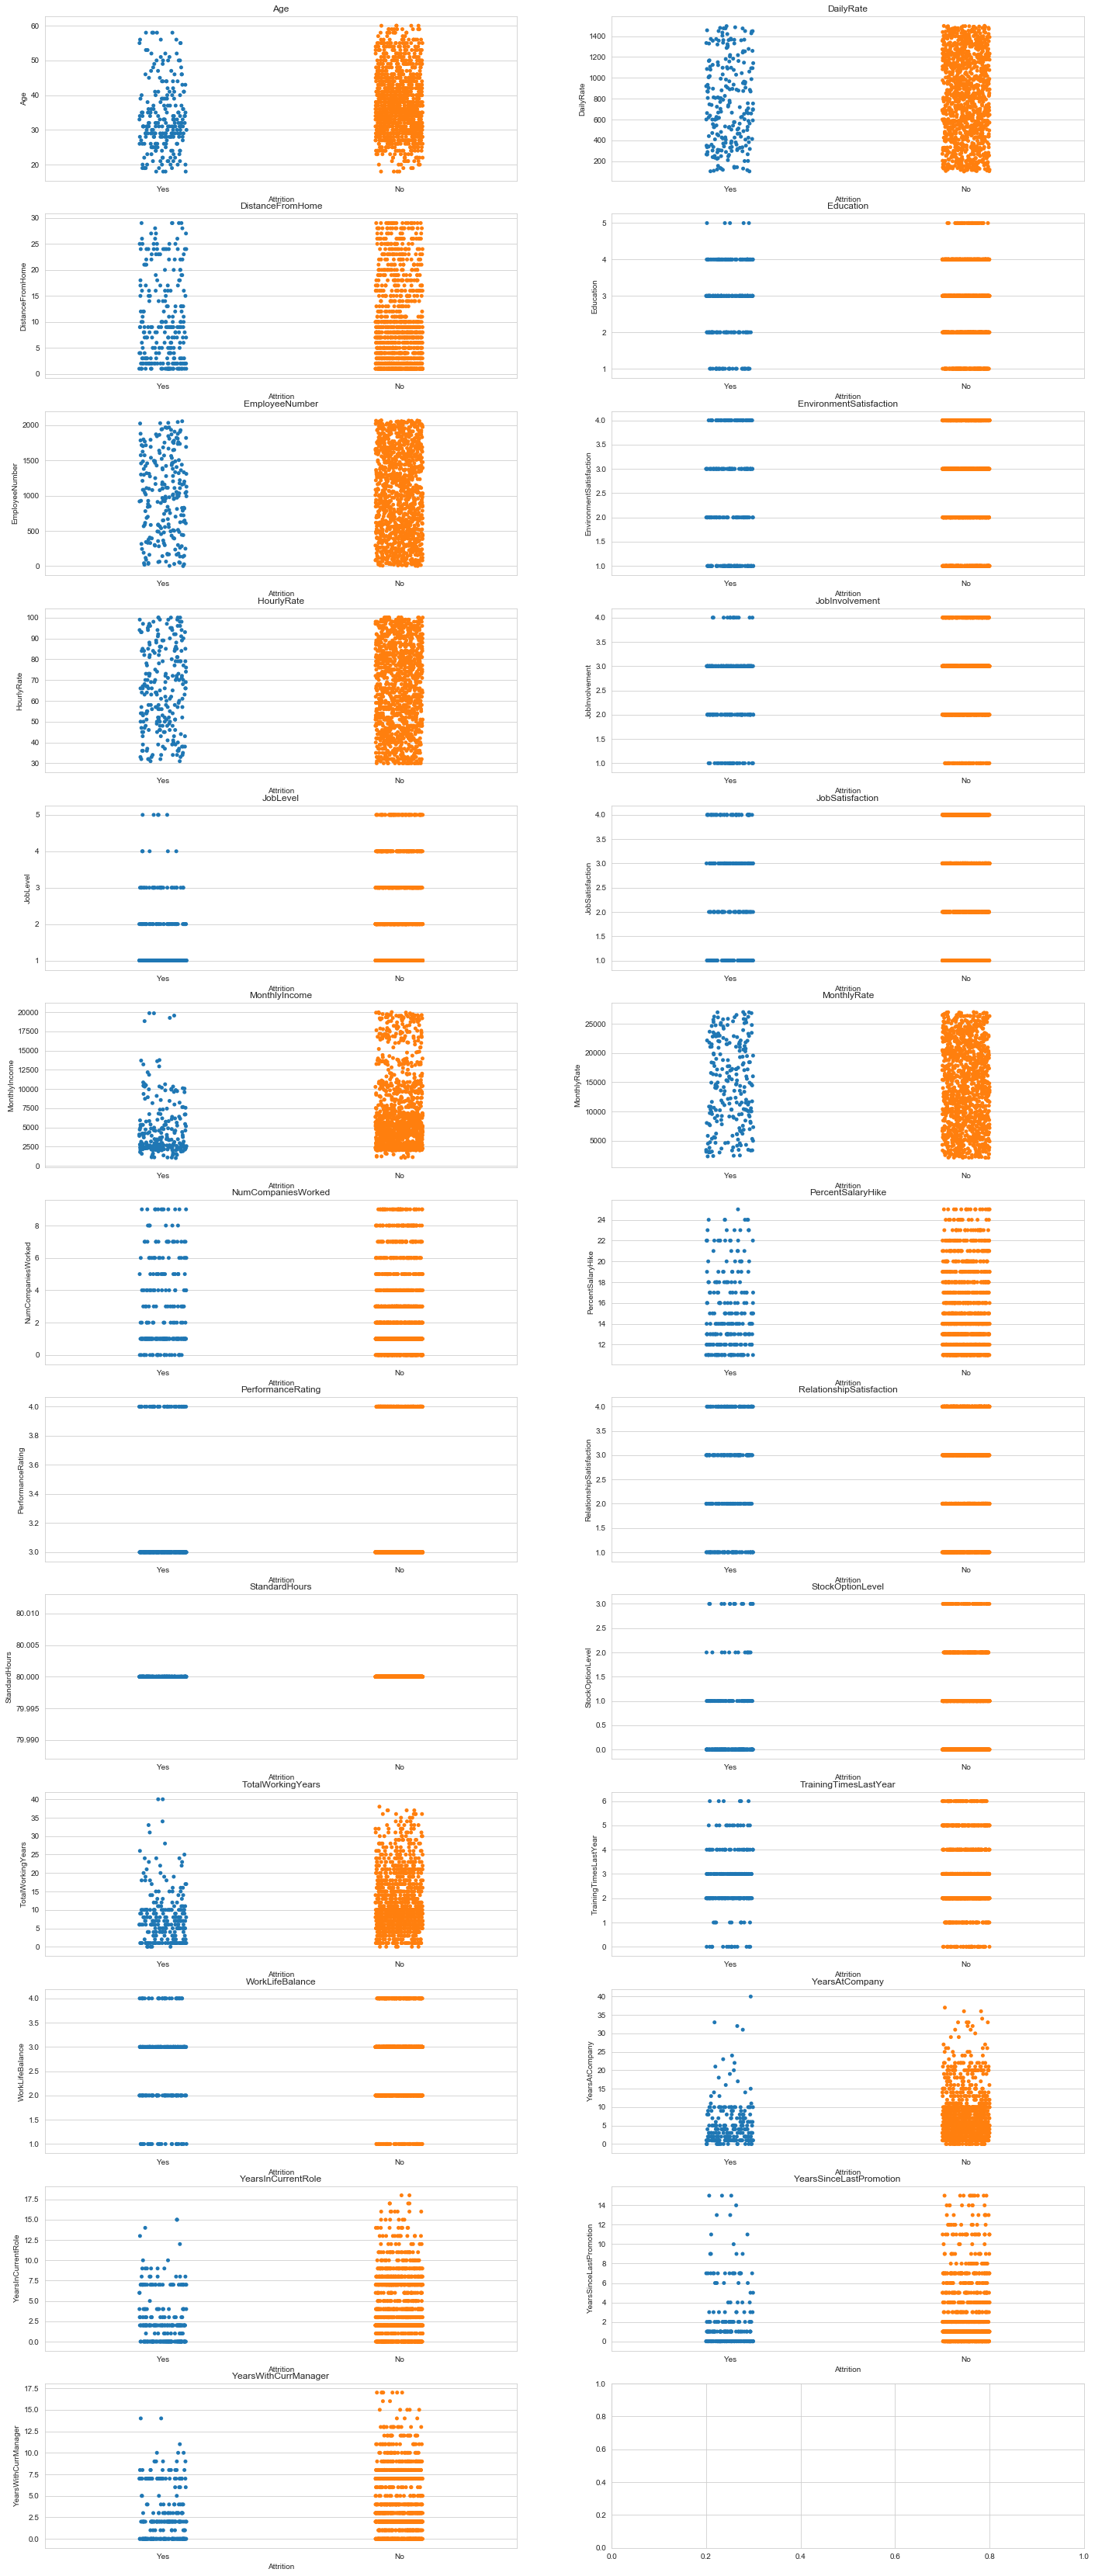

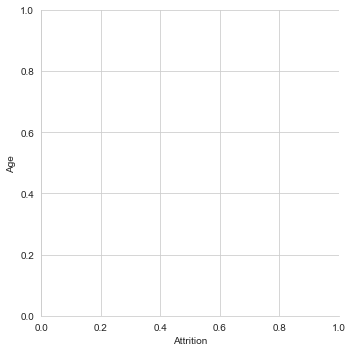

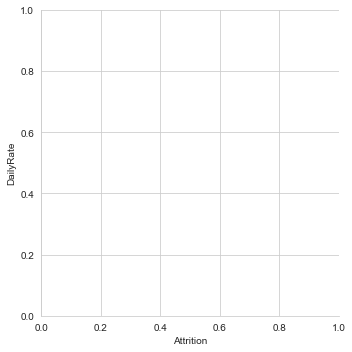

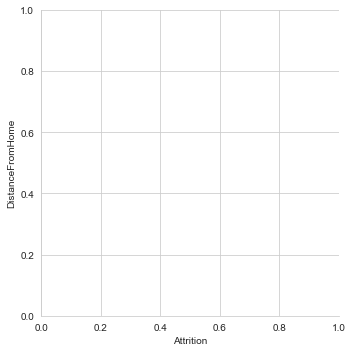

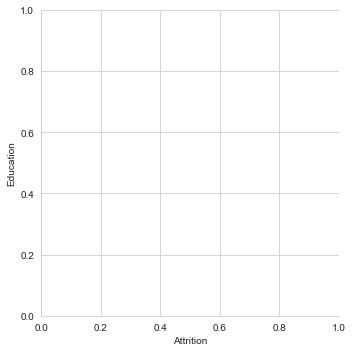

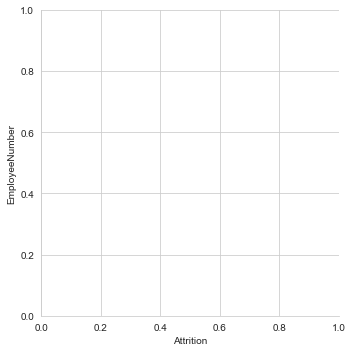

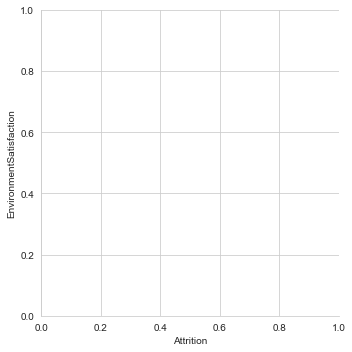

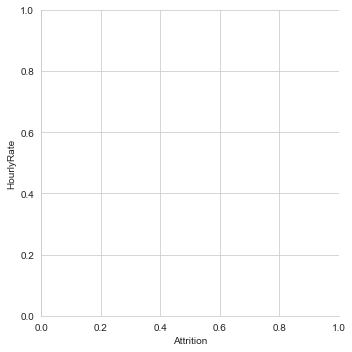

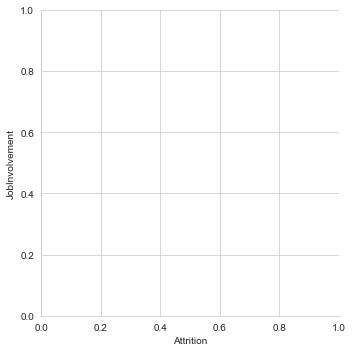

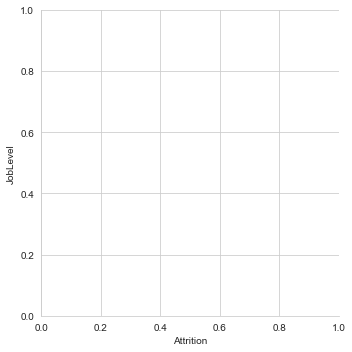

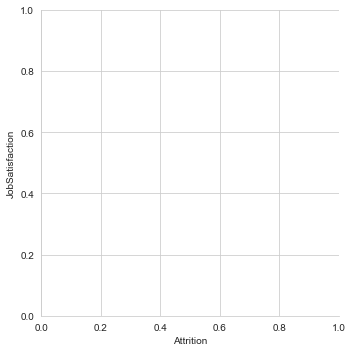

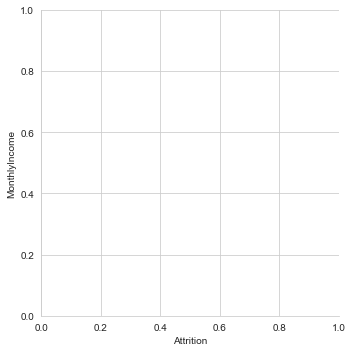

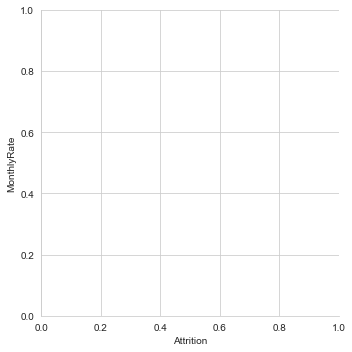

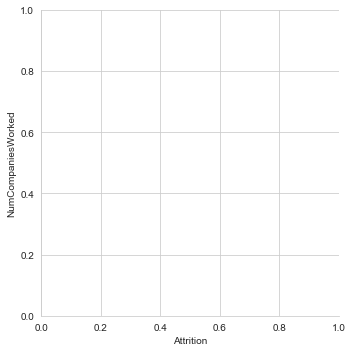

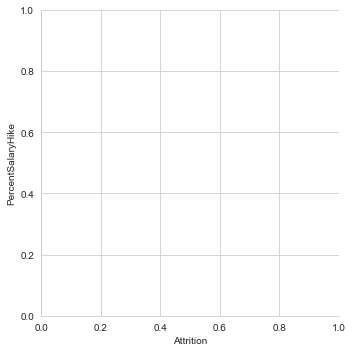

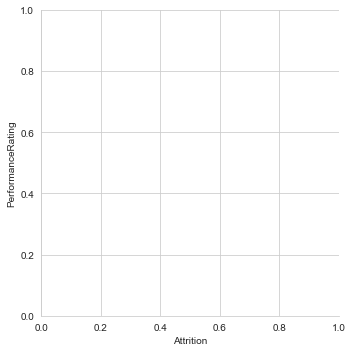

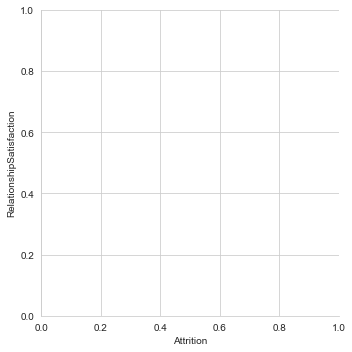

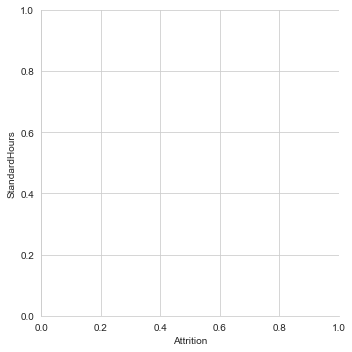

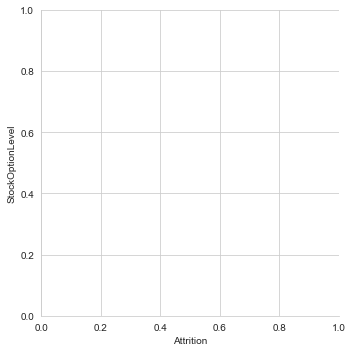

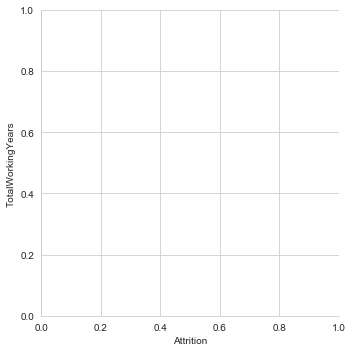

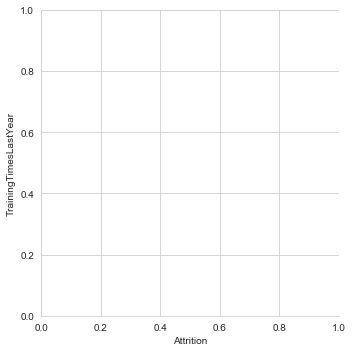

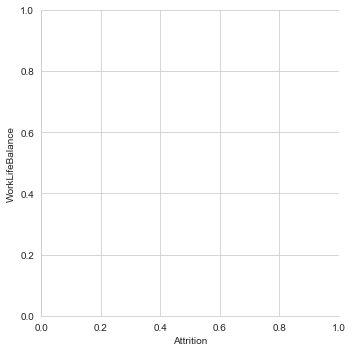

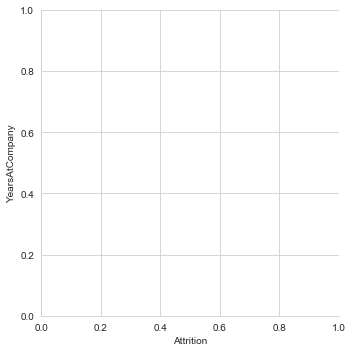

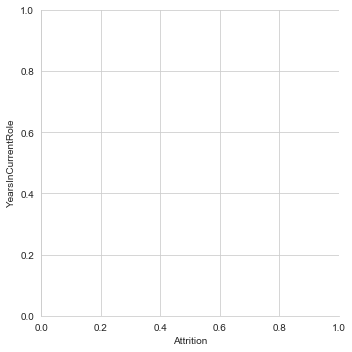

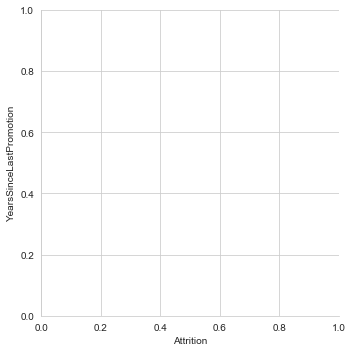

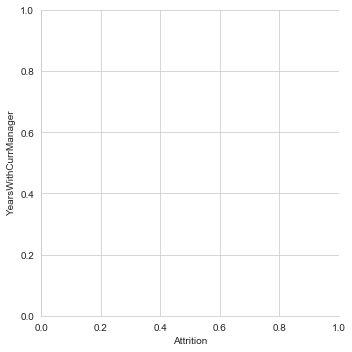

In [13]:
%matplotlib inline
fig,axes = plt.subplots(13,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
for i,col in enumerate(num_cols): 
    sns.catplot(x=TARGET_COL,y=col,data=df,ax=axs[i])
    axs[i].set_title(f'{col}')
plt.tight_layout()
plt.show()

### Box plots

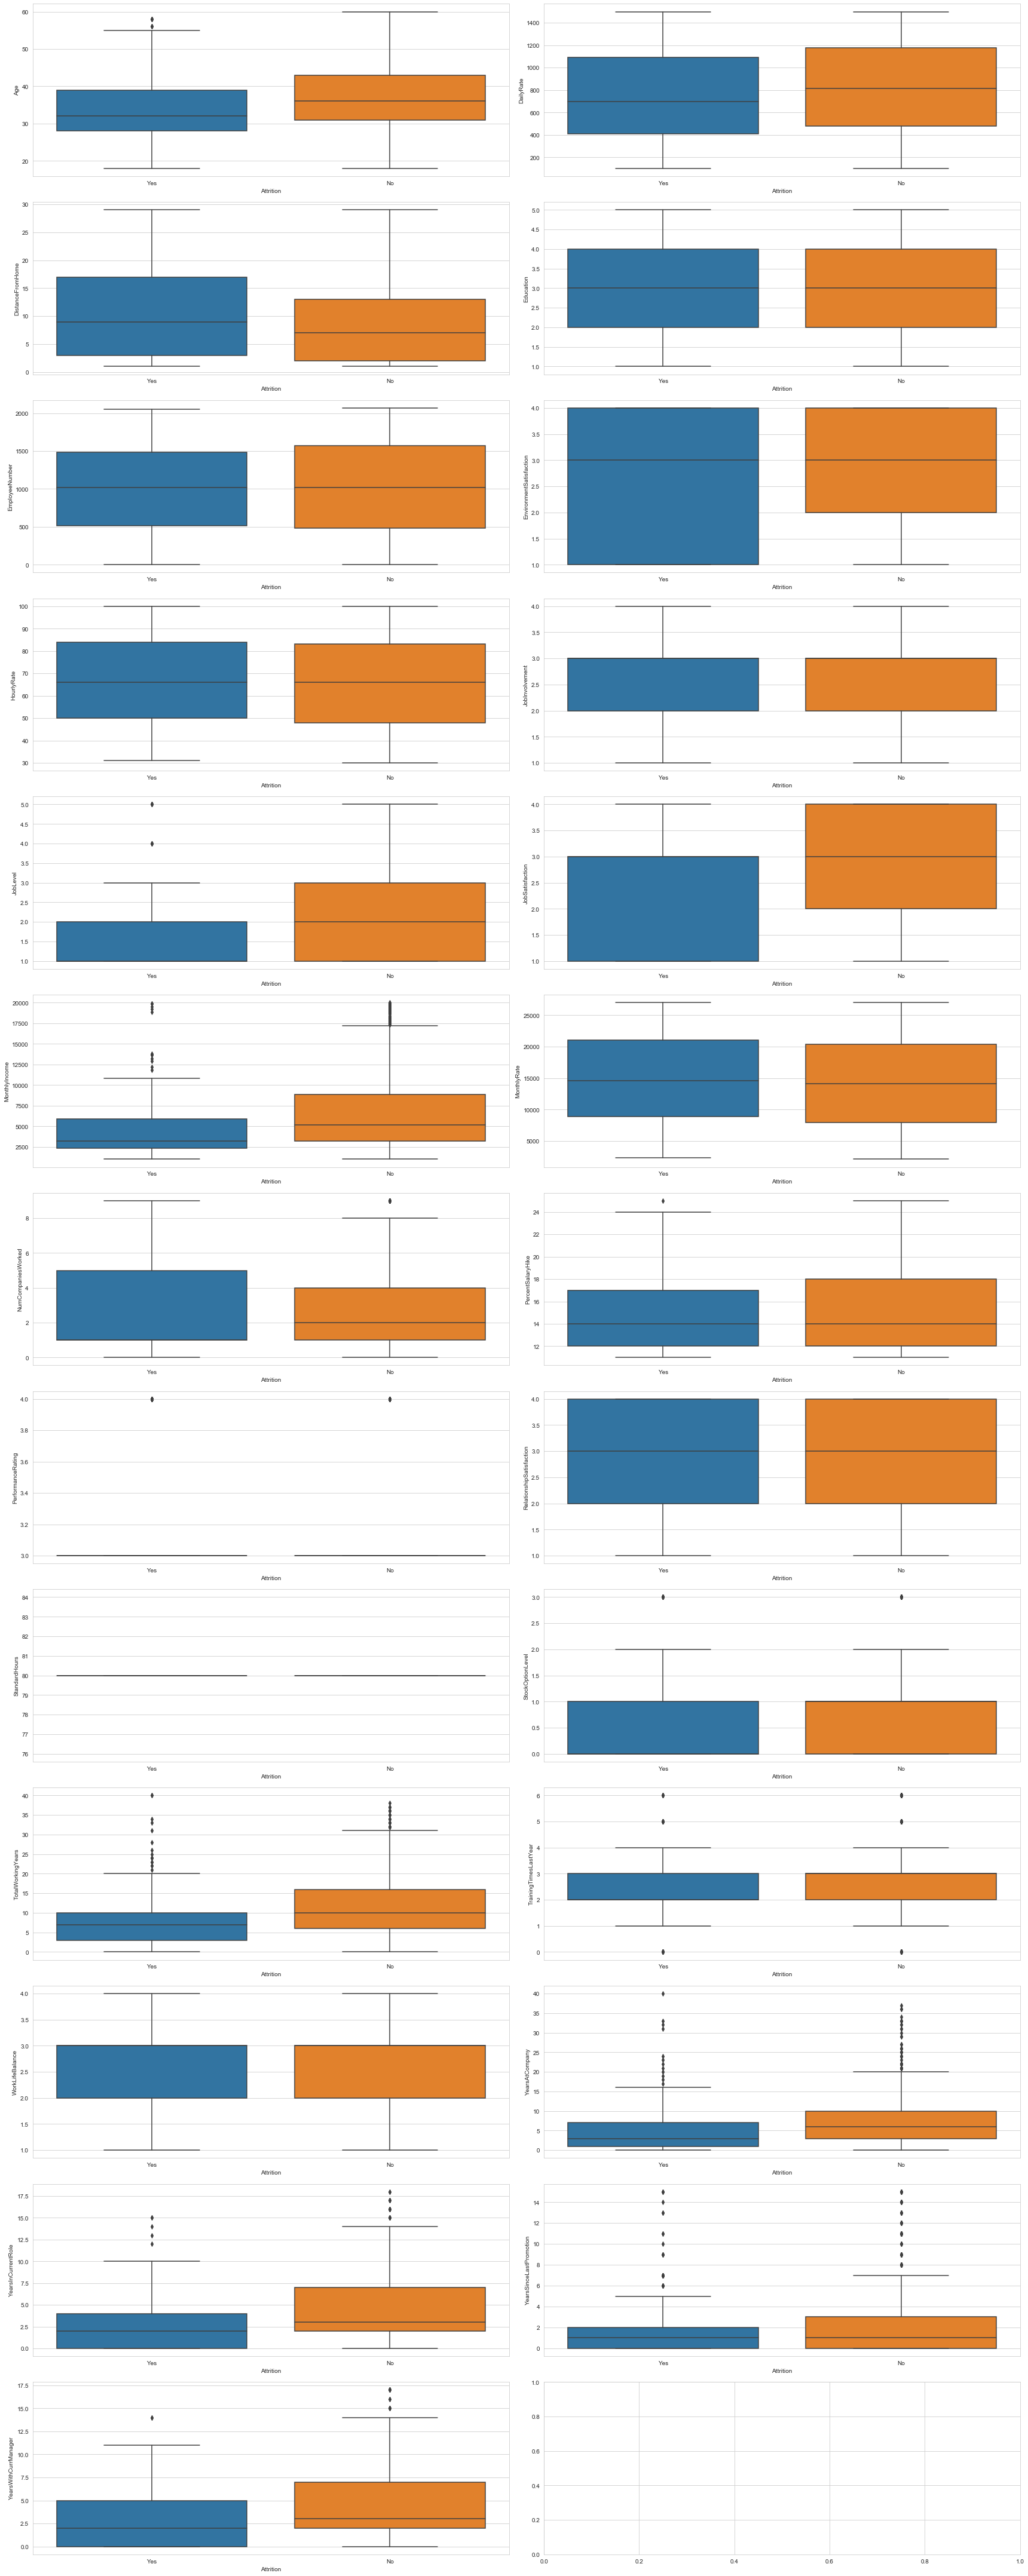

In [14]:
%matplotlib inline
fig,axes = plt.subplots(13,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
# num_cols=['YearsWithCurrManager']
for i,col in enumerate(num_cols): 
    sns.boxplot(x='Attrition',y=col,data=df,ax=axs[i])
#     axs[i].set_title(f'{col}')
plt.tight_layout()
plt.show()

## Categorical Columns

In [15]:
cat_cols = list(df.select_dtypes(include='O').columns)
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### Pie charts

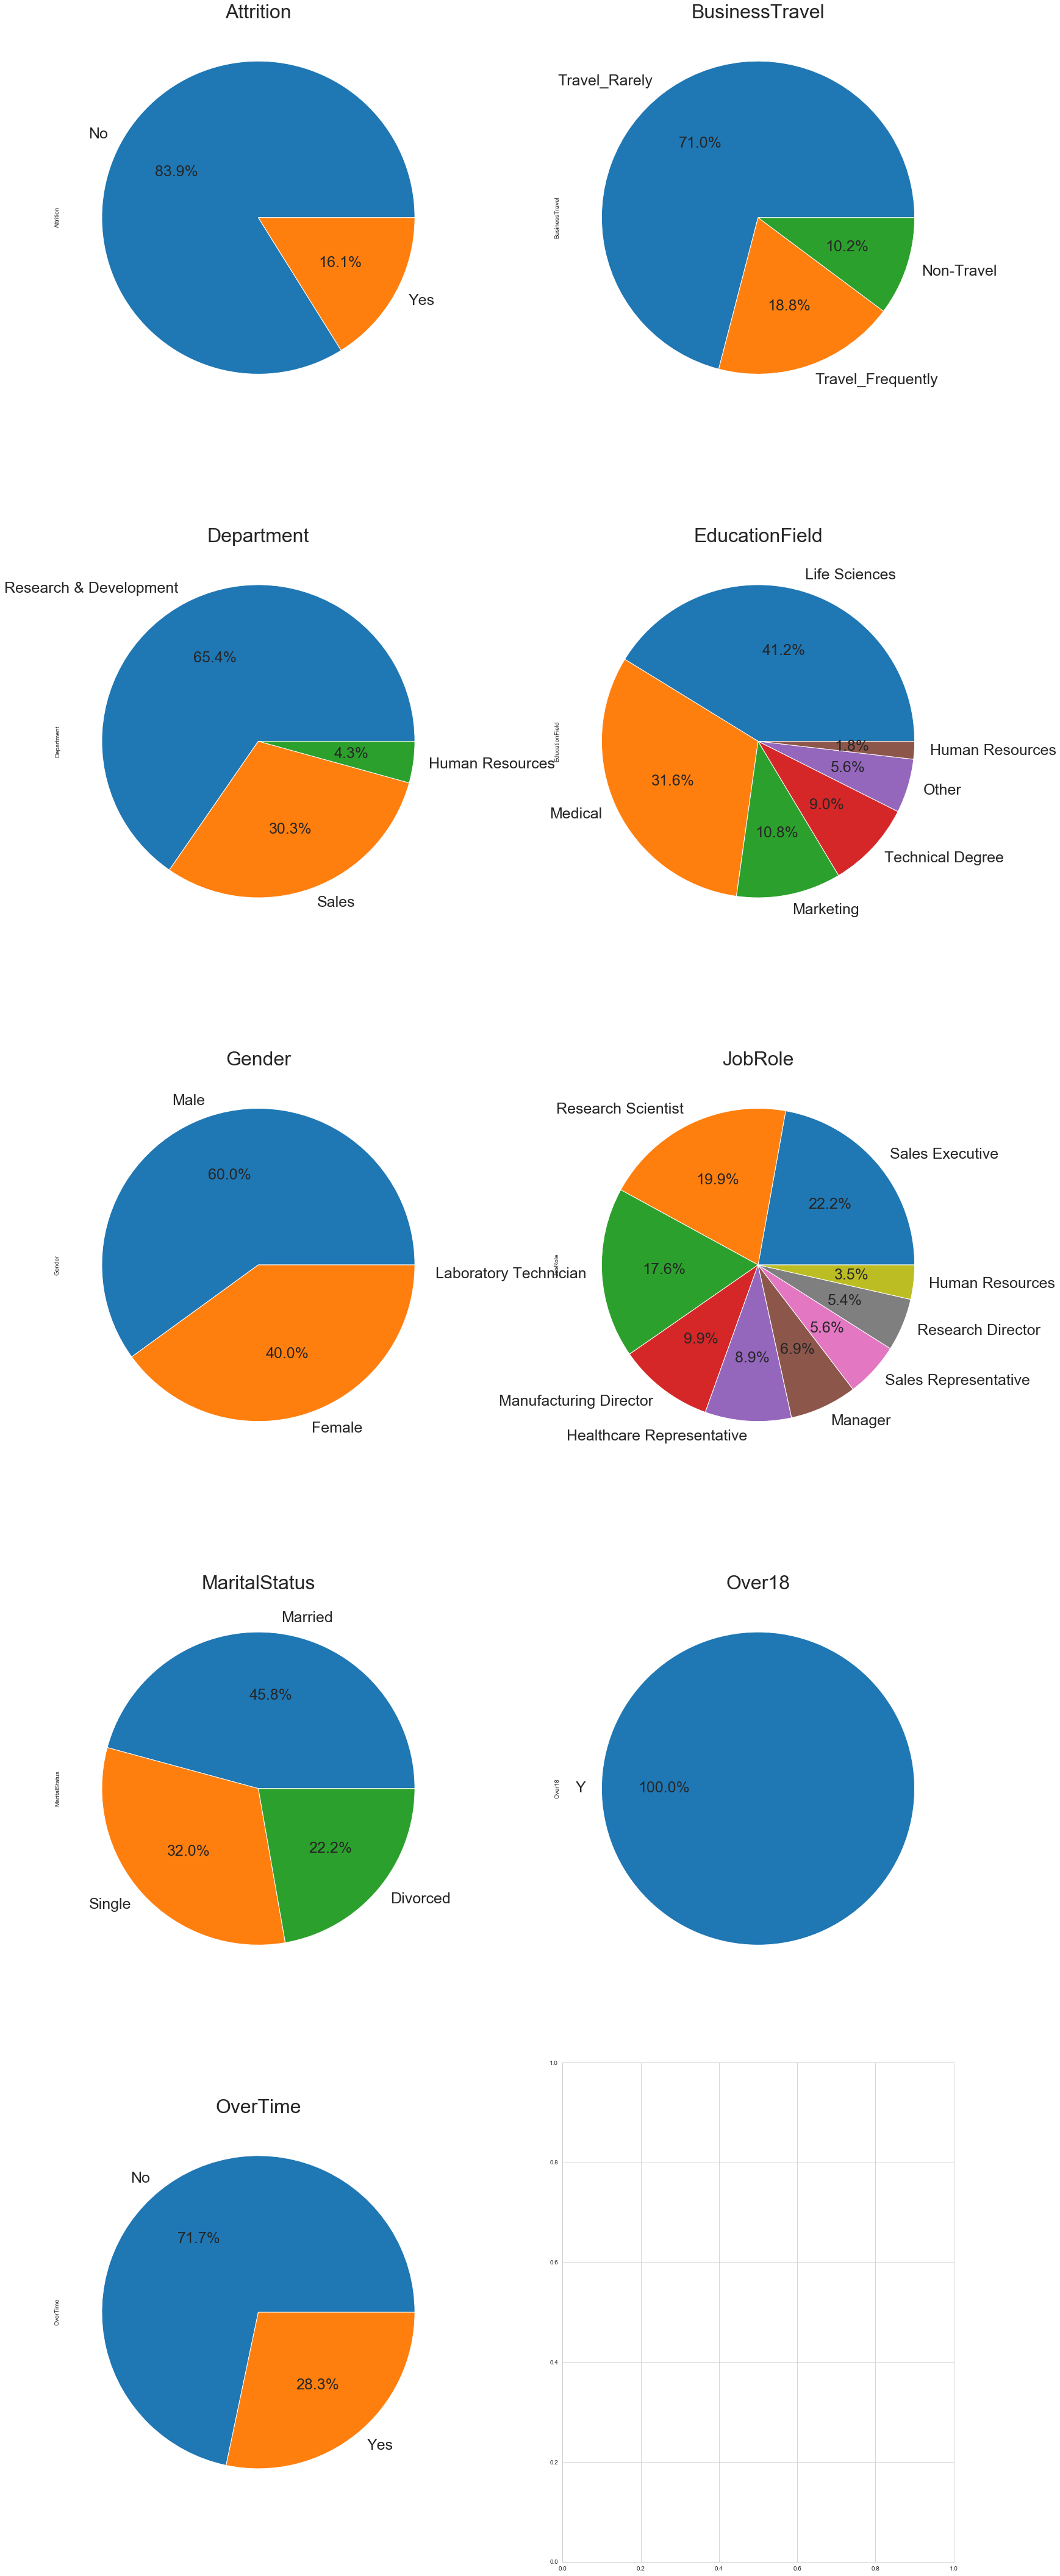

In [16]:
# plt.grid()
fig,axes = plt.subplots(5,2,figsize=(24,60))
axs = [ax for axes_row in axes for ax in axes_row]
for i,col in enumerate(cat_cols):
    sizes = df[col].value_counts()[::]
    labels = list(sizes.index)
#     plt.pie(sizes,labels=labels,autopct="%1.1f%",ax=axs[i])
    df[col].value_counts().plot(kind='pie',autopct="%1.1f%%",fontsize=25,ax=axs[i])
    axs[i].set_title(col,fontsize=32)
plt.tight_layout()

### Count plots

<Figure size 576x288 with 0 Axes>

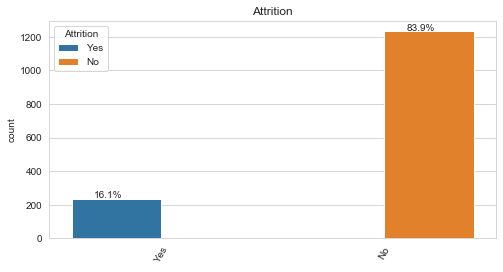

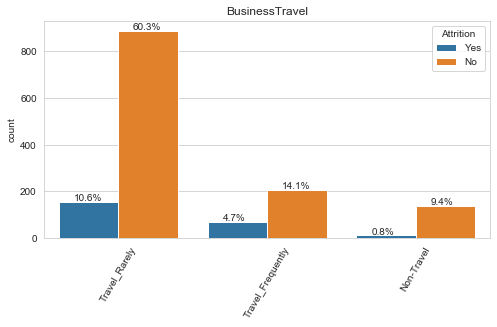

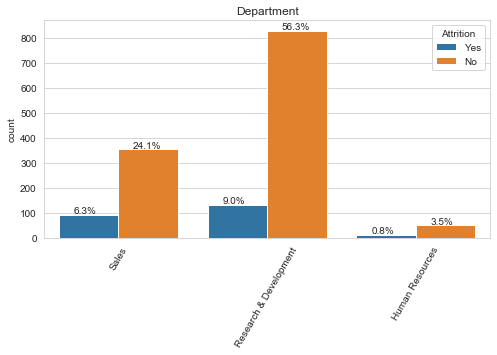

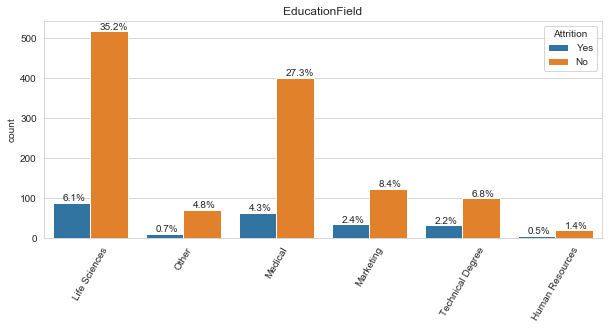

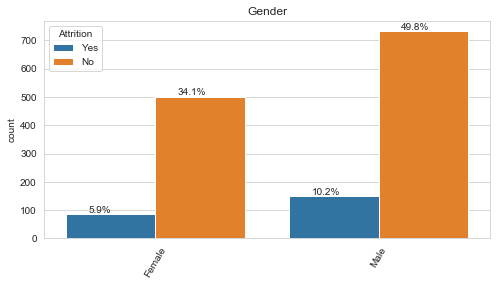

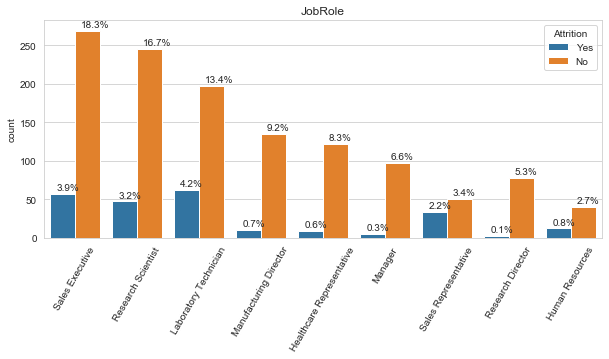

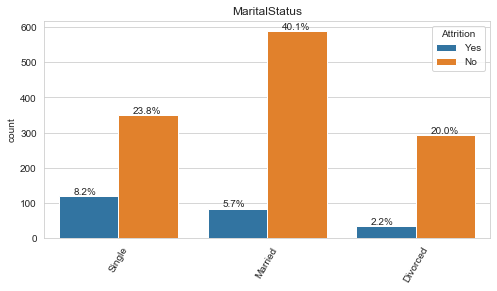

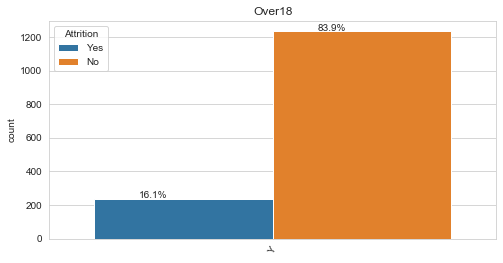

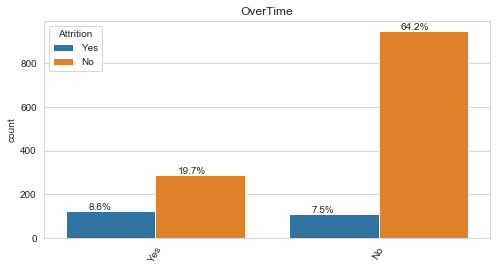

In [17]:
plt.figure(figsize=(8,4))
for col in cat_cols:
    if col in ['EducationField','JobRole']:
        plt.figure(figsize=(10,4))
    else:
         plt.figure(figsize=(8,4))
    ax = sns.countplot(df[col],hue=df[TARGET_COL])
    ax.set_xlabel('')
    ax.set_title(col)
    plt.xticks(rotation=60)
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), (p.get_x()+0.1, p.get_height()+5))
    plt.show()

In [18]:
factors_paired = [(i,j) for i in cat_cols for j in cat_cols ]

chi_values=[]
p_values=[]

for t in factors_paired:    
    chi = chi2_contingency(pd.crosstab(df[t[0]],df[t[1]]))
    chi_values.append(chi[0])
    p_values.append(chi[1])    
p = np.array(p_values).reshape(9,9)

pd.DataFrame(p.round(2),index=cat_cols,columns=cat_cols)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Attrition,0.00,0.00,0.00,0.01,0.29,0.00,0.00,1.0,0.00
BusinessTravel,0.00,0.00,1.00,0.88,0.13,0.74,0.11,1.0,0.24
Department,0.00,1.00,0.00,0.00,0.23,0.00,0.16,1.0,0.95
EducationField,0.01,0.88,0.00,0.00,0.71,0.00,0.48,1.0,0.88
Gender,0.29,0.13,0.23,0.71,0.00,0.04,0.17,1.0,0.12
JobRole,0.00,0.74,0.00,0.00,0.04,0.00,0.04,1.0,0.58
MaritalStatus,0.00,0.11,0.16,0.48,0.17,0.04,0.00,1.0,0.66
Over18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
OverTime,0.00,0.24,0.95,0.88,0.12,0.58,0.66,1.0,0.00


In [19]:
df['Age_bins'] = pd.cut(df['Age'],bins=[18,30,40,50,60],labels=['Less Exp','Exp','More Exp','Reaching Retirementd'])
df['Age_bins']

0       More Exp
1       More Exp
2            Exp
3            Exp
4       Less Exp
          ...   
1465         Exp
1466         Exp
1467    Less Exp
1468    More Exp
1469         Exp
Name: Age_bins, Length: 1470, dtype: category
Categories (4, object): [Less Exp < Exp < More Exp < Reaching Retirementd]

In [20]:
df['Age_bins'].value_counts()

Exp                     619
Less Exp                378
More Exp                322
Reaching Retirementd    143
Name: Age_bins, dtype: int64

In [21]:
cross_tab = pd.crosstab(df['Age_bins'], df['Attrition']).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
cross_tab

Attrition,No,Yes
Age_bins,,
Less Exp,74.60,25.40
Exp,86.27,13.73
More Exp,89.44,10.56
Reaching Retirementd,87.41,12.59


In [22]:
cross_tab.reset_index()

Attrition,Age_bins,No,Yes
0,Less Exp,74.60,25.40
1,Exp,86.27,13.73
2,More Exp,89.44,10.56
3,Reaching Retirementd,87.41,12.59


In [23]:
pd.crosstab(df['Age_bins'], df['Attrition'])

Attrition,No,Yes
Age_bins,,
Less Exp,282,96
Exp,534,85
More Exp,288,34
Reaching Retirementd,125,18


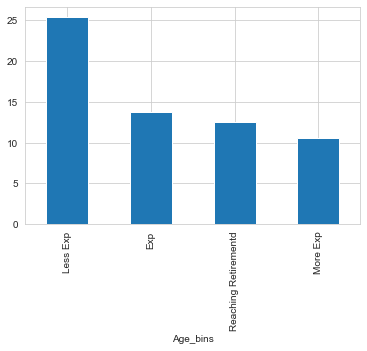

In [24]:
cross_tab['Yes'].sort_values(ascending=False).plot.bar()
plt.show()

In [25]:
# !pip install researchpy

In [26]:
import researchpy as rp

In [27]:
table,results = rp.crosstab(df['Age_bins'],df['Attrition'],prop='col',test='chi-square')

In [28]:
table

Attrition                
                            No     Yes     All
Age_bins                                      
Less Exp                 22.95   41.20   25.85
Exp                      43.45   36.48   42.34
More Exp                 23.43   14.59   22.02
Reaching Retirementd     10.17    7.73    9.78
All                     100.00  100.00  100.00

In [29]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,35.6450
1,p-value =,0.0000
2,Cramer's V =,0.1561


In [30]:
df = df.drop(['EmployeeCount','EmployeeNumber','Age_bins'],axis=1)

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
cat_cols = df.nunique()[df.nunique()<15].keys().tolist()

In [33]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [34]:
num_cols = [col for col in df.columns if col not in cat_cols+[TARGET_COL]]

In [35]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [36]:
bin_cols = df.nunique()[df.nunique()<3].keys().tolist()
bin_cols

['Attrition',
 'Gender',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'StandardHours']

In [37]:
multi_cols = [col for col in cat_cols if col not in bin_cols]
multi_cols

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [38]:
dummies = pd.get_dummies(df[multi_cols],drop_first=True)
dummies.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2,2,3,2,4,8,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,3,2,2,2,1,4,1,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,4,2,1,3,6,2,0,3,3,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,4,4,3,1,3,1,3,0,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,1,3,1,2,9,4,1,3,3,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [39]:
df = pd.concat([df,dummies],axis=1)

In [40]:
multi_cols

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [41]:
df = df.drop(multi_cols,axis=1)

In [42]:
minmax = MinMaxScaler()

In [43]:
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols] 

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.000000,0.200,0.150,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.857143,0.250,0.250,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.285714,0.175,0.000,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.000000,0.200,0.200,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,0.071429,0.150,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.428571,0.425,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.285714,0.225,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.037938,0.107143,0.814286,0.270300,0.123670,0.642857,0.150,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.659270,0.035714,0.471429,0.230700,0.447661,0.214286,0.425,0.225,0.333333,0.000000,0.470588


In [44]:
df[bin_cols]

,Attrition,Gender,Over18,OverTime,PerformanceRating,StandardHours
0,Yes,Female,Y,Yes,3,80
1,No,Male,Y,No,4,80
2,Yes,Male,Y,Yes,3,80
3,No,Female,Y,Yes,3,80
4,No,Male,Y,No,3,80
...,...,...,...,...,...,...
1465,No,Male,Y,No,3,80
1466,No,Male,Y,No,3,80
1467,No,Male,Y,Yes,4,80
1468,No,Male,Y,No,3,80


In [45]:
df.shape

(1470, 37)

In [46]:
for col in bin_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [47]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,Over18,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.0,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.292590,0.600000,0.512731,0.289307,0.490629,0.0,0.282993,0.300680,0.153741,0.0,0.28199,0.175204,0.234958,0.145850,0.242537,0.188435,0.709524,0.653741,0.303401,0.412245,0.108163,0.315646,0.055782,0.089796,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,0.217509,0.367863,0.288840,0.289531,0.490065,0.290420,0.247918,0.285797,0.0,0.450606,0.261424,0.360824,0.0,0.19452,0.153163,0.201285,0.214829,0.209890,0.391193,0.454137,0.475939,0.459884,0.492406,0.310692,0.464931,0.229579,0.285986,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035714,0.000000,0.257143,0.100158,0.239028,0.0,0.000000,0.071429,0.000000,0.0,0.15000,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.501074,0.214286,1.000000,0.514286,0.205898,0.487513,0.0,0.000000,0.214286,0.000000,0.0,0.25000,0.125000,0.166667,0.066667,0.176471,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.000000,0.755190,0.464286,1.000000,0.767857,0.388099,0.737503,0.0,1.000000,0.500000,0.000000,0.0,0.37500,0.225000,0.388889,0.200000,0.411765,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [48]:
list(df.columns)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Gender',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StandardHours',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [49]:
features = [col for col in df.columns if col not in TARGET_COL]
features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Gender',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StandardHours',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [50]:
x = df[features]
y = df[TARGET_COL]

In [51]:
import statsmodels.api as sm

In [52]:
logit = sm.Logit(y,x)
result = logit.fit(method='ncg')
result.summary()

Optimization terminated successfully.
         Current function value: 0.337949
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           33
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:                  0.2349
Time:                        17:33:22   Log-Likelihood:                -496.78
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.694e-46
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -1.2457        nan        nan        nan         nan         nan
DailyRate                            -0.5100        nan        nan        nan         nan         nan
DistanceFromHome                      0.8996        nan        nan        nan         nan         nan
Gender                                0.2524        nan        nan        nan         nan         nan
HourlyRate                            0.0424        nan        nan        nan         nan         nan
MonthlyIncome                        -0.3105        nan        nan        nan         nan         nan
MonthlyRate                          -0.0333        nan        nan        nan         nan         nan
Over18                                     0        nan        nan        nan         nan         nan
OverTime                              1.6031        nan        nan        nan         nan         nan
PercentSalaryHike                    -0.3261        nan        nan        nan         nan         nan
PerformanceRating                     0.2172        nan        nan        nan         nan         nan
StandardHours                              0        nan        nan        nan         nan         nan
TotalWorkingYears                    -0.2854        nan        nan        nan         nan         nan
YearsAtCompany                        1.4161        nan        nan        nan         nan         nan
YearsInCurrentRole                   -2.4580        nan        nan        nan         nan         nan
YearsSinceLastPromotion               2.3496        nan        nan        nan         nan         nan
YearsWithCurrManager                 -2.1032        nan        nan        nan         nan         nan
BusinessTravel_Travel_Frequently      1.2449        nan        nan        nan         nan         nan
BusinessTravel_Travel_Rarely          0.6067        nan        nan        nan         nan         nan
Department_Research & Development    -1.8590        nan        nan        nan         nan         nan
Department_Sales                     -0.5238        nan        nan        nan         nan         nan
EducationField_Life Sciences         -1.4436        nan        nan        nan         nan         nan
EducationField_Marketing             -1.1243        nan        nan        nan         nan         nan
EducationField_Medical               -1.5194        nan        nan        nan         nan         nan
EducationField_Other                 -1.6311        nan        nan        nan         nan         nan
EducationField_Technical Degree      -0.7056        nan        nan        nan         nan         nan
JobRole_Human Resources              -1.2567        nan        nan        nan         nan         nan
JobRole_Laboratory Technician         1.1939        nan        nan        nan         nan         nan
JobRole_Manager                      -1.3359        nan        nan        nan  

In [53]:
y_pred = result.predict(x)

In [54]:
from sklearn.metrics import roc_curve,auc

In [55]:
fpr,tpr,thresholds = roc_curve(y,y_pred)

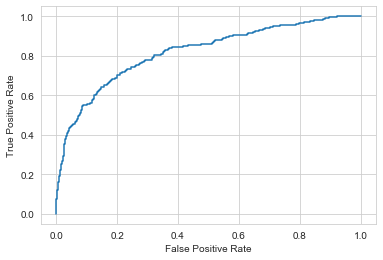

In [56]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [57]:
roc_auc = auc(fpr, tpr)

In [58]:
roc_auc

0.8180692010498902

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression()

In [61]:
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = logreg.predict(x)

In [63]:
fpr,tpr,thresholds = roc_curve(y_pred,y)

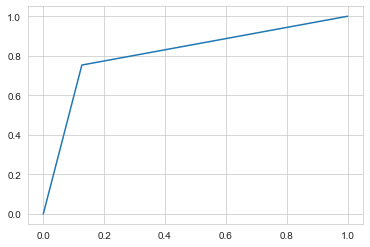

In [64]:
plt.plot(fpr,tpr)
plt.show()

# \\[ \sum_{} nd\\]

In [65]:
# cramers V
# Newton Conjugate Gradient












# pd.crosstab

# chi,p,dof,expected = chi2_contingency(pd.crosstab(df[f[0][0]],df[f[0][1]],margins=True))
# chi

# len(chi)

# chi[0]

# f = factors_paired

# for t in enumerate(factors_paired):
#     ift[i] != t[j]:
        





# # %matplotlib inline
# # fig,axes = plt.subplots(7,2,figsize=(25,25))
# # axs = [ax for axes_row in axes for ax in axes_row]
# # # num_cols=['YearsWithCurrManager']
# # ddfor i,col in enumerate(num_cols1):    
# # #     _ = sns.kdeplot(emp_attr[col],ax=axs[idx])
# #     _=emp_attr[col].plot(kind='density',ax=axs[i])
# #     axs[i].set_ylabel('')
# #     axs[i].set_xlabel(col)
    
# # plt.tight_layout()
# # plt.show()

# # %matplotlib inlineMM
# # fig,axes = plt.subplots(7,2,figsize=(25,25))
# # axs = [ax for axes_row in axes for ax in axes_row]
# # # num_cols=['YearsWithCurrManager']
# # for i,col in enumerate(num_cols2):    
# # #     _ = sns.kdeplot(emp_attr[col],ax=axs[idx])
# #     _=emp_attr[col].plot(kind='density',ax=axs[i])
# #     axs[i].set_ylabel('')
# #     axs[i].set_xlabel(col)
    
# # plt.tight_layout()
# # plt.show()

# emp_attr.dtypes.value_counts()

# cat_data = emp_attr.select_dtypes(include='object')

# cat_data.head()

# fig = plt.figure(figsize=(16,15))
# for i,col in enumerate(cat_data.columns):
#     plt.subplot(3,3,i+1)
#     ax = sns.countplot(cat_data[col])
#     for p in ax.patches:
#         ax.annotate('{:.1f}%'.format(p.get_height()/emp_attr.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))

# plt.tight_layout()    
# plt.show()    

# emp_attr.shape[0]

# emp_attr['Over18'].value_counts()

# emp_attr['Over18'].describe

# 237/1470

# sns.set_style('whitegrid')
# ax = sns.countplot(emp_attr['Attrition'])
# # ax.set_yticks(np.arange(0, 110, 10))
# for p in ax.patches:
#         print(p.get_height())
#         ax.annotate('{:.1f}%'.format(p.get_height()/emp_attr.shape[0]*100), (p.get_x()+0.4, p.get_height()+5))
# #         ax.annotate('{.1f}%'.format(p.get_height()/emp_attr.shape[0]), (p.get_x()+0.4, p.get_height()+5))
        
# # ax2 = ax.twinx()
# # ax2.set_yticks(np.arange(0, 110, 10)*len(emp_attr)/100)
# # plt.legend(True)        
# plt.tight_layout()        

# # values.values

# values = emp_attr['Attrition'].value_counts()[::]
# labels='No','Yes'

# # help(plt.pie)
# plt.figure(figsize=(16,8))
# plt.pie(values,labels=labels,autopct='%1.1f%%')
# plt.show()